# Course 1: Classification and Vector Spaces
# Week 4: Hash functions and multiplanes

In this lab, we are going to practice the most important concepts related to the hash functions explained in the videos. You will be using these in this week's assignment.

A key point for the lookup using hash functions is the calculation of the hash key or bucket id that we assign for a given entry. In this notebook, we will cover:

- Basic hash tables
- Multiplanes
- Random planes

## Basic hash tables

Hash tables are data structures that allow indexing data to make lookup tasks more efficient. In this part, you will see the implementation of the simplest hash function.

In [18]:
import numpy as np
import pprint
from utils_nb import plot_vectors
import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter(indent=4)

In the next cell, we will define a straightforward hash function for integer numbers. The function will receive a list of integer numbers and the desired amount of buckets. The function will produce a hash table stored as a dictionary, where keys contain the hash keys, and the values will provide the hashed elements of the input list.

The hash function is just the remainder of the integer division between each element and the desired number of buckets.

In [19]:
def basic_hash_table(value_l, n_buckets):
    
    def hash_function(value, n_buckets):
        return int(value) % n_buckets
    
    hash_table = {i:[] for i in range(n_buckets)} # Initialize all the buckets in the hash table as empty lists

    for value in value_l:
        hash_value = hash_function(value,n_buckets) # Get the hash key for the given value
        hash_table[hash_value].append(value) # Add the element to the corresponding bucket
    
    return hash_table

In [20]:
value_l = [100, 10, 14, 17, 97] # Set of values to hash
hash_table_example = basic_hash_table(value_l, n_buckets=10)
pp.pprint(hash_table_example)

{   0: [100, 10],
    1: [],
    2: [],
    3: [],
    4: [14],
    5: [],
    6: [],
    7: [17, 97],
    8: [],
    9: []}


## Planes

Multiplanes hash functions are other types of hash functions. Multiplanes hash functions are based on the idea of numbering every single region that is formed by the intersection of n planes. In the following code, we show the most basic forms of the multiplanes principle. First, with a single plane:



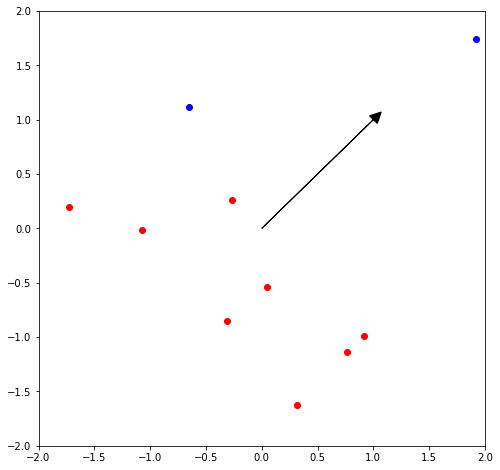

In [21]:
P = np.array([[1, 1]]) # Define a single plane. 
fig, ax1 = plt.subplots(figsize=(8, 8)) # Create a plot

plot_vectors([P], axes=[2, 2], ax=ax1) # Plot the plane P as a vector

# Plot  random points. 
for i in range(0, 10):
        v1 = np.array(np.random.uniform(-2, 2, 2)) # Get a pair of random numbers between -4 and 4 
        side_of_plane = np.sign(np.dot(P, v1.T)) 
        
        # Color the points depending on the sign of the result of np.dot(P, point.T)
        if side_of_plane == 1:
            ax1.plot([v1[0]], [v1[1]], 'bo') # Plot blue points
        else:
            ax1.plot([v1[0]], [v1[1]], 'ro') # Plot red points

plt.show()

The first thing to note is that the vector that defines the plane does not mark the boundary between the two sides of the plane. It marks the direction in which you find the 'positive' side of the plane. Not intuitive at all!

If we want to plot the separation plane, we need to plot a line that is perpendicular to our vector P. We can get such a line using a  rotation matrix.

Feel free to change the direction of the plane P.

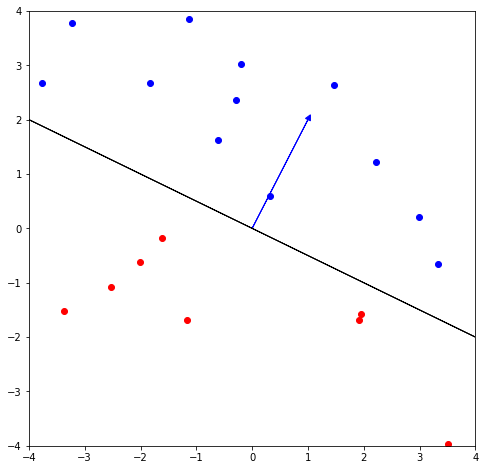

In [22]:
P = np.array([[1, 2]])  # Define a single plane. You may change the direction

# Get a new plane perpendicular to P. We use a rotation matrix
PT = np.dot([[0, 1], [-1, 0]], P.T).T  

fig, ax1 = plt.subplots(figsize=(8, 8)) # Create a plot with custom size

plot_vectors([P], colors=['b'], axes=[2, 2], ax=ax1) # Plot the plane P as a vector

# Plot the plane P as a 2 vectors. 
# We scale by 2 just to get the arrows outside the current box
plot_vectors([PT * 4, PT * -4], colors=['k', 'k'], axes=[4, 4], ax=ax1)

# Plot 20 random points. 
for i in range(0, 20):
        v1 = np.array(np.random.uniform(-4, 4, 2)) # Get a pair of random numbers between -4 and 4 
        side_of_plane = np.sign(np.dot(P, v1.T)) # Get the sign of the dot product with P
        # Color the points depending on the sign of the result of np.dot(P, point.T)
        if side_of_plane == 1:
            ax1.plot([v1[0]], [v1[1]], 'bo') # Plot a blue point
        else:
            ax1.plot([v1[0]], [v1[1]], 'ro') # Plot a red point

plt.show()